## SME0828 - Introdução à Ciência de Dados

Aluno: Natan Henrique Sanches (11795680)

Entrega 3 - Regressão Linear Simples

In [47]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score

#### 1. Para os dados gerados pelo código abaixo, ajuste um modelo de regressão polinomial considerando um polinômio de grau 3 e 5. Qual oferece o melhor ajuste em termos do coeficiente rR2?

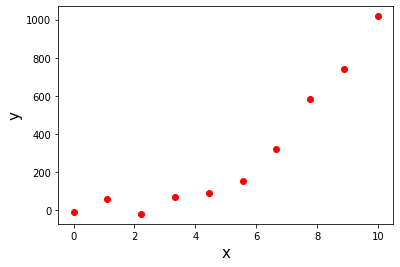

In [48]:
N = 10
x = np.linspace(0,10,N)
y = x**3 + np.random.normal(0,50, N)
plt.plot(x,y, 'ro')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)

plt.show(True)

In [49]:
x = x.reshape(-1, 1)

**Regressão polinomial de grau 3**

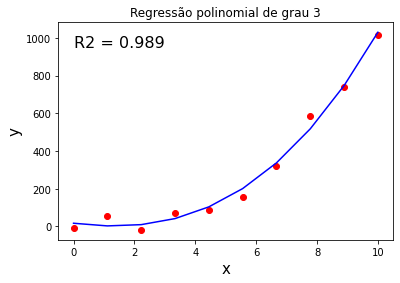

In [50]:
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(x)
model = LinearRegression().fit(X_poly, y)

y_pred = model.predict(X_poly)
R2_3 = np.round(r2_score(y, y_pred), decimals=3)

plt.plot(x, y_pred, color='blue')
plt.scatter(x, y, color='red')
plt.text(0, 950, f'R2 = {R2_3}', fontsize=16)
plt.title('Regressão polinomial de grau 3')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.show()

**Regressão polinomial de grau 5**

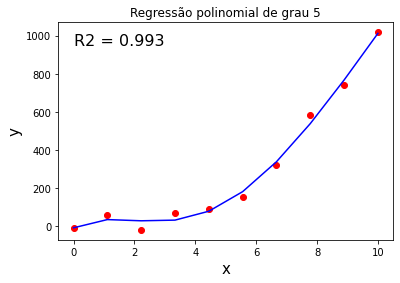

In [51]:
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(x)
model = LinearRegression().fit(X_poly, y)

y_pred = model.predict(X_poly)
R2_5 = np.round(r2_score(y, y_pred), decimals=3)

plt.plot(x, y_pred, color='blue')
plt.scatter(x, y, color='red')
plt.text(0, 950, f'R2 = {R2_5}', fontsize=16)
plt.title('Regressão polinomial de grau 5')
plt.ylabel("y", fontsize=15)
plt.xlabel("x", fontsize=15)
plt.show()

Dado a grande magnitude possível do erro ɛ inserido na função $y = x^3 + ɛ$ e julgando pelo coeficiente $R^2$, calculado em ambas as regressões, pode-se concluir que o modelo que melhor descreve os pontos é um polinômio de grau 5.

#### 2. Ajuste um modelo e realize a inferência para a base de casas de Boston. Faça o diagnóstico e verifique se o modelo é adequado.

**Análise de p-valor**

In [52]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    boston = load_boston()
    X, y = load_boston(return_X_y=True)

In [53]:
df = pd.DataFrame(X, columns=boston.feature_names)
df['PRICE'] = pd.Series(boston.target)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [54]:
lin_reg = LinearRegression().fit(X, y)
model = ols("PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE \
    + DIS + RAD + TAX + PTRATIO + LSTAT", data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Tue, 27 Sep 2022   Prob (F-statistic):          2.23e-133
Time:                        00:50:33   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

Pela análise feita acima de $P > |t|$, não conseguimos rejeitar as hipóteses de que as _features_ INDUS e AGE não possuem relação com a variável dependente PRICE. 

Com relação as demais features do conjunto de dados, rejeitamos a hipótese de que elas não possuem relação com a variável dependente.

**Diagnóstico**

- É esperado que os resíduos sejam normalmente distribuídos.

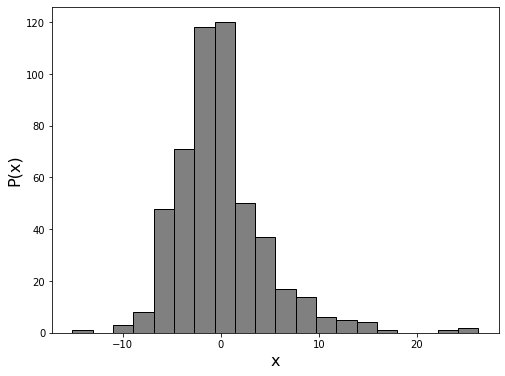

In [55]:
residuals = model.resid

plt.figure(figsize=(8,6))
plt.hist(residuals, bins=20, color='grey', ec='black')
plt.xlabel('x', fontsize=16)
plt.ylabel('P(x)', fontsize=16)
plt.show()

Pelo gráfico acima, os resíduos não aparentam seguir uma distribuição normal.

#### 3. Ajuste um modelo para a base de dados de propagandas (Advertising.csv) e faça a inferência. Todas as variáveis são importantes para o ajuste ou alguma delas pode ser descartada?

**Análise de p-valor**

In [56]:
df = pd.read_csv('Advertising.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [57]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

reg = LinearRegression().fit(X, y)
model = ols('sales ~ TV + radio + newspaper', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           1.58e-96
Time:                        00:50:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Pela análise de $P > |t|$, não é possível rejeitar a hipótese de que a _feature_ 'newspaper' não tem relação com a variável dependente. 

Assim, podemos considerar que 'newspaper' não está diretamente relacionado com 'sales' na regressão e, portanto, ela pode ser desprezada na análise.